<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/AI_Global_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/AI_index_db.csv')

In [3]:
df.head()

,Country,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,United States of America,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,Americas,Power players,High,Liberal democracy
1,China,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,Asia-Pacific,Power players,Upper middle,Closed autocracy
2,United Kingdom,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,Europe,Traditional champions,High,Liberal democracy
3,Canada,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,Americas,Traditional champions,High,Liberal democracy
4,Israel,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,Middle East,Rising stars,High,Liberal democracy


In [4]:
df.shape

(62, 13)

In [5]:
df.columns

Index(['Country', 'Talent', 'Infrastructure', 'Operating Environment',
       'Research', 'Development', 'Government Strategy', 'Commercial',
       'Total score', 'Region', 'Cluster', 'Income group', 'Political regime'],
      dtype='object')

In [6]:
df['Country'].unique()

array(['United States of America', 'China', 'United Kingdom', 'Canada',
       'Israel', 'Singapore', 'South Korea', 'The Netherlands', 'Germany',
       'France', 'Australia', 'Ireland', 'Finland', 'Denmark',
       'Luxembourg', 'Japan', 'India', 'Switzerland', 'Sweden',
       'Hong Kong', 'Spain', 'Austria', 'Estonia', 'Taiwan', 'Norway',
       'Saudi Arabia', 'Belgium', 'Poland', 'Slovenia', 'New Zealand',
       'Italy', 'Russia', 'Malta', 'United Arab Emirates', 'Portugal',
       'Czech Republic', 'Iceland', 'Lithuania', 'Brazil', 'Greece',
       'Slovakia', 'Hungary', 'Malaysia', 'Mexico', 'Chile', 'Argentina',
       'Qatar', 'Turkey', 'Colombia', 'Uruguay', 'Bahrain', 'Vietnam',
       'Indonesia', 'Tunisia', 'South Africa', 'Morocco', 'Armenia',
       'Sri Lanka', 'Egypt', 'Kenya', 'Nigeria', 'Pakistan'], dtype=object)

In [7]:
df['Cluster'].unique()

array(['Power players', 'Traditional champions', 'Rising stars',
       'Waking up', 'Nascent'], dtype=object)

In [8]:
df['Region'].unique()

array(['Americas', 'Asia-Pacific', 'Europe', 'Middle East', 'Africa'],
      dtype=object)

In [9]:
df['Income group'].unique()

array(['High', 'Upper middle', 'Lower middle'], dtype=object)

In [10]:
df['Political regime'].unique()

array(['Liberal democracy', 'Closed autocracy', 'Electoral democracy',
       'Electoral autocracy'], dtype=object)

In [11]:
df.isnull().sum()

Country                  0
Talent                   0
Infrastructure           0
Operating Environment    0
Research                 0
Development              0
Government Strategy      0
Commercial               0
Total score              0
Region                   0
Cluster                  0
Income group             0
Political regime         0
dtype: int64

In [12]:
df = df.drop(columns='Country',axis=1)

**Encoding**

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder()

In [15]:
df['Cluster'] = LE.fit_transform(df['Cluster'])

In [16]:
df['Region'] = LE.fit_transform(df['Region'])

In [17]:
df['Income group'] = LE.fit_transform(df['Income group'])

In [18]:
df['Political regime'] = LE.fit_transform(df['Political regime'])

In [19]:
df.head()

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Cluster,Income group,Political regime
0,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,1,0,3
1,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,2,1,2,0
2,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,3,3,0,3
3,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,3,0,3
4,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,2,0,3


**Data Visualization**

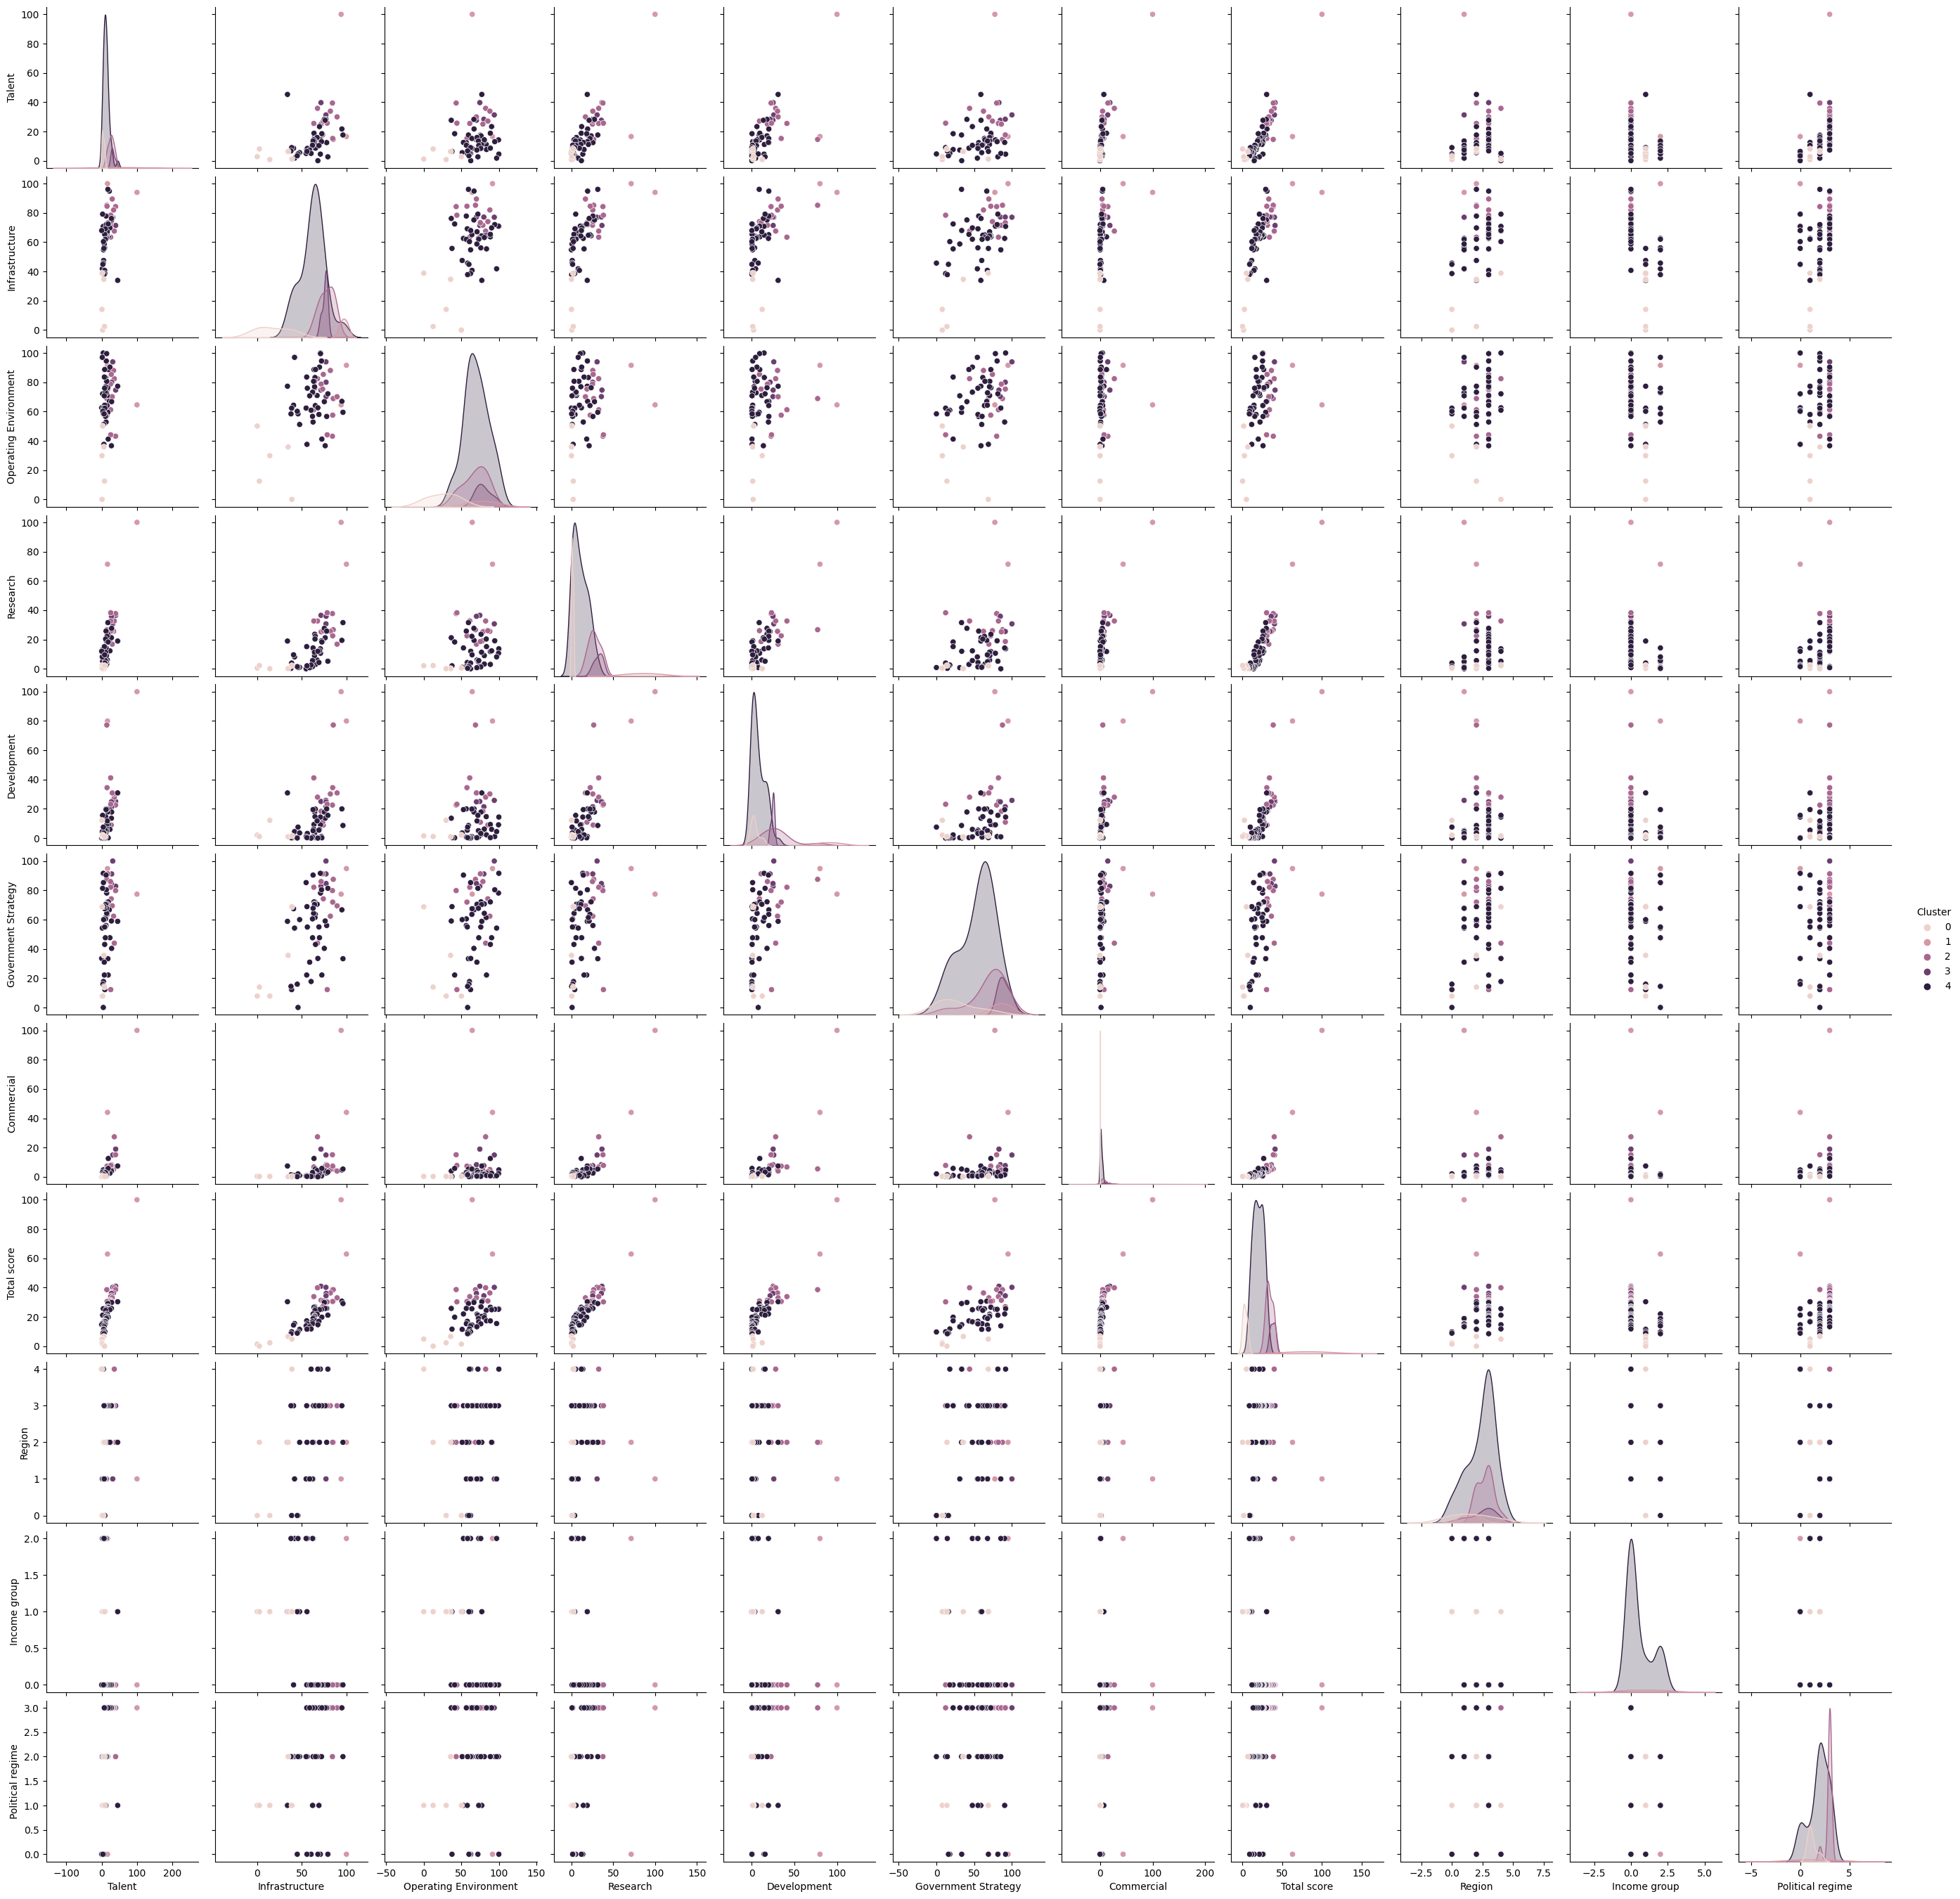

In [20]:
sns.pairplot(df,hue='Cluster')
plt.show()

HeatMap

Text(0.5, 1.0, 'Correlation Heatmap')

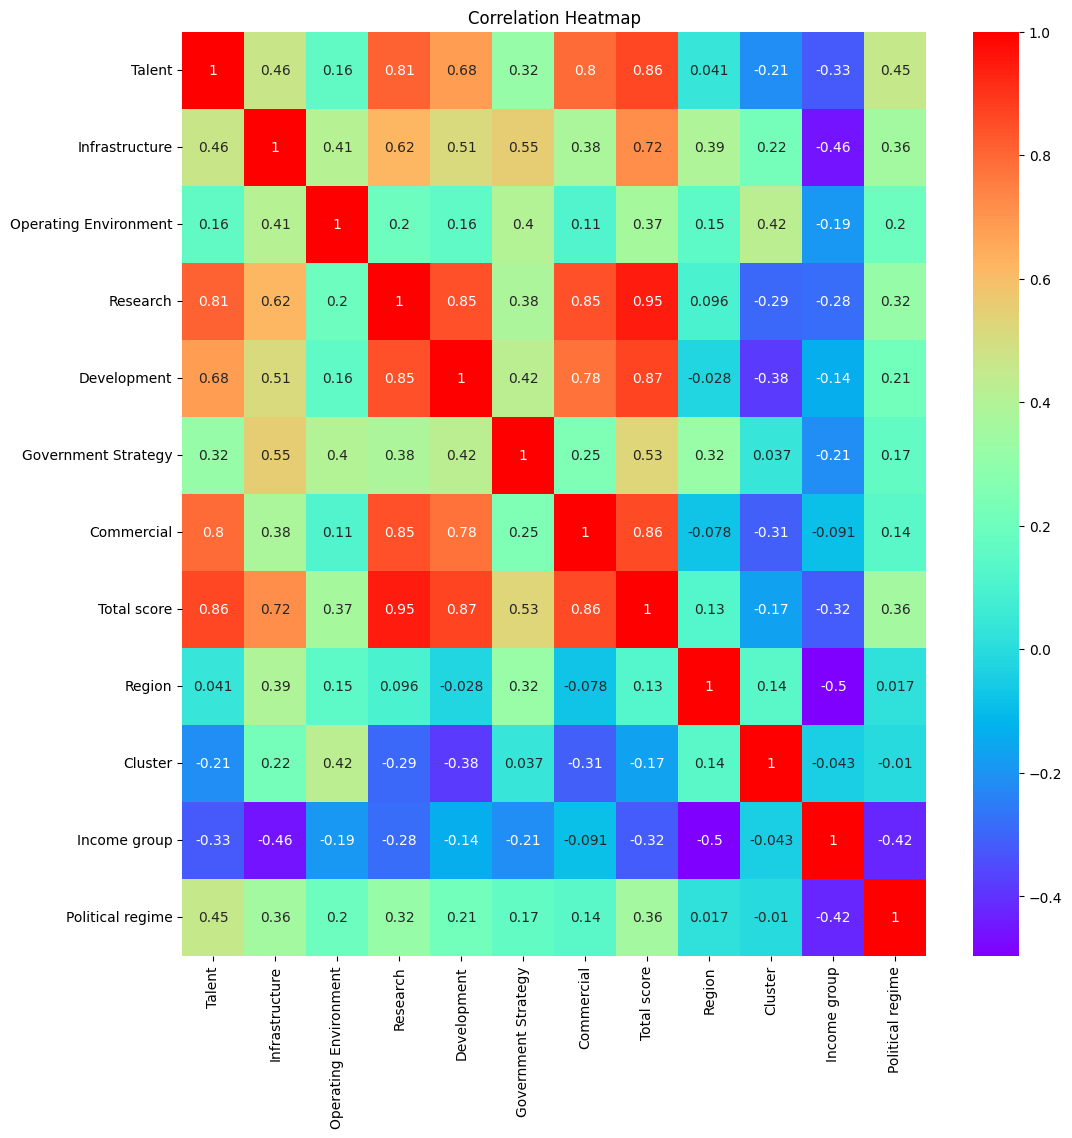

In [21]:
Corr = df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(Corr, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

**Train & Test Split**

In [22]:
X = df.drop(columns='Cluster',axis=1)
X

,Talent,Infrastructure,Operating Environment,Research,Development,Government Strategy,Commercial,Total score,Region,Income group,Political regime
0,100.00,94.02,64.56,100.00,100.00,77.39,100.00,100.00,1,0,3
1,16.51,100.00,91.57,71.42,79.97,94.87,44.02,62.92,2,2,0
2,39.65,71.43,74.65,36.50,25.03,82.82,18.91,40.93,3,0,3
3,31.28,77.05,93.94,30.67,25.78,100.00,14.88,40.19,1,0,3
4,35.76,67.58,82.44,32.63,27.96,43.91,27.33,39.89,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...
57,6.27,34.64,35.79,0.12,0.95,35.57,0.09,6.62,2,1,2
58,1.11,38.84,0.00,2.08,1.54,68.72,0.31,4.83,4,1,1
59,0.75,14.11,29.84,0.07,12.15,7.75,0.31,2.30,0,1,1
60,2.74,0.00,50.10,0.45,2.06,7.75,0.33,1.38,0,1,1


In [23]:
y = df[['Cluster']]
y

,Cluster
0,1
1,1
2,3
3,3
4,2
...,...
57,0
58,0
59,0
60,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
y_train_1d = np.ravel(y_train)

In [27]:
from sklearn.svm import SVC
from hyperopt import fmin,tpe,Trials,hp,STATUS_OK
from sklearn.model_selection import cross_val_score

In [28]:
S = SVC()

In [29]:
space ={
    'C' : hp.quniform('C',1,5,1),
    'kernel': hp.choice('kernel',['linear', 'poly', 'rbf', 'sigmoid'])
}

In [33]:
def Bayesian(space):
    S = SVC(C = int(space['C']),
            kernel=space['kernel'])
    accuracy = cross_val_score(S,X_train,y_train_1d,cv=5).mean()
    return {'loss': -accuracy , 'status' : STATUS_OK}

In [34]:
trials = Trials()

In [35]:
Best = fmin(fn=Bayesian,space=space,algo=tpe.suggest,max_evals=200,trials=trials)

  5%|▌         | 10/200 [00:00<00:03, 48.80trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

  8%|▊         | 15/200 [00:00<00:03, 49.02trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 12%|█▎        | 25/200 [00:00<00:03, 45.83trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 18%|█▊        | 36/200 [00:00<00:03, 46.83trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 24%|██▎       | 47/200 [00:00<00:03, 48.19trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 28%|██▊       | 57/200 [00:01<00:02, 47.73trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 34%|███▎      | 67/200 [00:01<00:02, 45.92trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 38%|███▊      | 77/200 [00:01<00:02, 45.62trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 44%|████▎     | 87/200 [00:01<00:02, 45.63trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 48%|████▊     | 97/200 [00:02<00:02, 44.83trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 54%|█████▎    | 107/200 [00:02<00:02, 43.81trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 58%|█████▊    | 117/200 [00:02<00:01, 42.61trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 64%|██████▎   | 127/200 [00:02<00:01, 41.21trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 66%|██████▌   | 132/200 [00:02<00:01, 41.64trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 71%|███████   | 142/200 [00:03<00:01, 41.23trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 76%|███████▌  | 152/200 [00:03<00:01, 40.94trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 78%|███████▊  | 157/200 [00:03<00:01, 40.34trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 83%|████████▎ | 166/200 [00:03<00:00, 38.84trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 88%|████████▊ | 175/200 [00:04<00:00, 37.94trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 92%|█████████▏| 183/200 [00:04<00:00, 36.27trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

 96%|█████████▌| 191/200 [00:04<00:00, 36.98trial/s, best loss: -0.8177777777777777]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

100%|██████████| 200/200 [00:04<00:00, 42.23trial/s, best loss: -0.8177777777777777]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/

In [36]:
Best

{'C': 3.0, 'kernel': 1}

In [44]:
S = SVC(C = 3 , kernel='poly')

In [45]:
S.fit(X_train,y_train_1d)

SVC(C=3, kernel='poly')

**Prediction**

In [46]:
y_hat = S.predict(X_test)

**Model Evaluation**

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
print(accuracy_score(y_test,y_hat))

0.9230769230769231


In [49]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         7

    accuracy                           0.92        13
   macro avg       0.90      0.90      0.87        13
weighted avg       0.96      0.92      0.92        13



In [50]:
print(confusion_matrix(y_test,y_hat))

[[2 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 1 0]
 [0 0 0 1 0]
 [0 0 0 0 7]]
